In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

test  = pd.read_csv(r"C:\Users\Acer\Desktop\clustering\fraudTest.csv")
train = pd.read_csv(r"C:\Users\Acer\Desktop\clustering\fraudTrain.csv")

In [47]:
train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [48]:
train['gender'].unique()

array(['F', 'M'], dtype=object)

In [49]:
test 

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [50]:
test['gender'].unique()

array(['M', 'F'], dtype=object)

In [51]:
y_train = train['is_fraud']
X_train = train.drop(['is_fraud'], axis=1)

y_test = test['is_fraud']
X_test = test.drop(['is_fraud'], axis=1)

In [52]:
drop_cols = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num']
X_train = X_train.drop(columns = drop_cols)
X_test = X_test.drop(columns= drop_cols)

In [53]:
X_train.columns.tolist()

['category',
 'amt',
 'gender',
 'lat',
 'long',
 'city_pop',
 'job',
 'unix_time',
 'merch_lat',
 'merch_long']

In [54]:
fraud_count = y_train.value_counts()
fraud_count

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['category', 'gender', 'job']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    
    X_train[col] = le.fit_transform(X_train[col])

    X_test[col] = X_test[col].apply(lambda x: x if x in le.classes_ else 'unknown')

    le.classes_ = np.append(le.classes_, 'unknown')

    X_test[col] = le.transform(X_test[col])

    label_encoders[col] = le

In [56]:
X_train['distance'] = np.sqrt((X_train['lat'] - X_train['merch_lat']) ** 2 + (X_train['long'] - X_train['merch_long']) ** 2 )
X_test['distance'] = np.sqrt((X_test['lat'] - X_test['merch_lat']) ** 2 + (X_test['long'] - X_test['merch_long']) ** 2 )

In [57]:
X_train['hour'] = (X_train['unix_time'] % 86000) // 3600
X_test['hour'] = (X_test['unix_time'] % 86000) // 3600

In [58]:
X_train['amt_per_pop'] = X_train['amt'] / (X_train['city_pop'] + 1)
X_test['amt_per_pop'] = X_test['amt'] / (X_test['city_pop'] + 1)

In [59]:
X_train.shape[1]

13

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weight))
print(class_weight_dict)

{np.int64(0): np.float64(0.5029111776656126), np.int64(1): np.float64(86.37589928057554)}


In [62]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42, sampling_strategy=0.15)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train_scaled, y_train)

In [63]:
print(f"Original training size:     {X_train_scaled.shape[0]:,}")
print(f"Balaced training size:      {X_train_balanced.shape[0]:,}")

Original training size:     1,296,675
Balaced training size:      1,482,304


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf

model = Sequential([
    Dense(256, input_dim = X_train_balanced.shape[1], activation = 'relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation = 'relu'),
    Dropout(0.3),

    Dense(1, activation = 'sigmoid')
])

In [65]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy', metrics = ['accuracy', 'precision', 'recall'])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,641 (190.00 KB)

 Trainable params: 47,745 (186.50 KB)

 Non-trainable params: 896 (3.50 KB)

None


In [66]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True, verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 3, min_lr = 0.0001, verbose = 1)

In [67]:
history = model.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=1024,
    validation_data=(X_test_scaled, y_test), callbacks=[early_stopping, reduce_lr],
    verbose=1)

Epoch 1/50
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - accuracy: 0.9527 - loss: 0.1727 - precision: 0.8843 - recall: 0.7332 - val_accuracy: 0.9914 - val_loss: 0.0343 - val_precision: 0.2833 - val_recall: 0.8051 - learning_rate: 0.0010
Epoch 2/50
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.9689 - loss: 0.1129 - precision: 0.9333 - recall: 0.8197 - val_accuracy: 0.9921 - val_loss: 0.0312 - val_precision: 0.3026 - val_recall: 0.8089 - learning_rate: 0.0010
Epoch 3/50
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9712 - loss: 0.1005 - precision: 0.9423 - recall: 0.8297 - val_accuracy: 0.9952 - val_loss: 0.0184 - val_precision: 0.4315 - val_recall: 0.7469 - learning_rate: 0.0010
Epoch 4/50
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.9720 - loss: 0.0947 - precision: 0.9454 - recall: 0.8332 - val_accuracy: 0.9954 - val_loss: 0.0180 - val_precision: 0.4400 - val_recall: 0.7259 - learning_rate: 0.0010
Epoch 5/50
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 27s 19

In [68]:
y_pred_proba = model.predict(X_test_scaled, verbose = 1).flatten()

17367/17367 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step


In [69]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_idx = np.argmax(f1_score)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

Optimal Threshold: 0.4444


In [70]:
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int) 

In [71]:
from sklearn.metrics import classification_report , confusion_matrix, roc_auc_score, auc, average_precision_score, matthews_corrcoef

print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.54      0.63      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.81      0.79    555719
weighted avg       1.00      1.00      1.00    555719



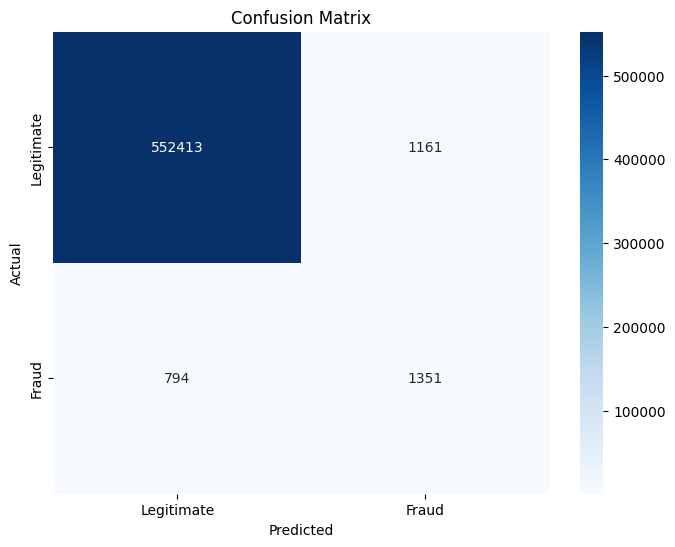

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [73]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

np.float64(0.9598024338104256)

In [74]:
auc_ = auc(recall, precision)
auc_

np.float64(0.582923275852837)

In [75]:
avg_precision = average_precision_score(y_test, y_pred_proba)
avg_precision

np.float64(0.58300523406742)

In [76]:
mcc = matthews_corrcoef(y_test, y_pred_optimal)
mcc

np.float64(0.5802662756333196)

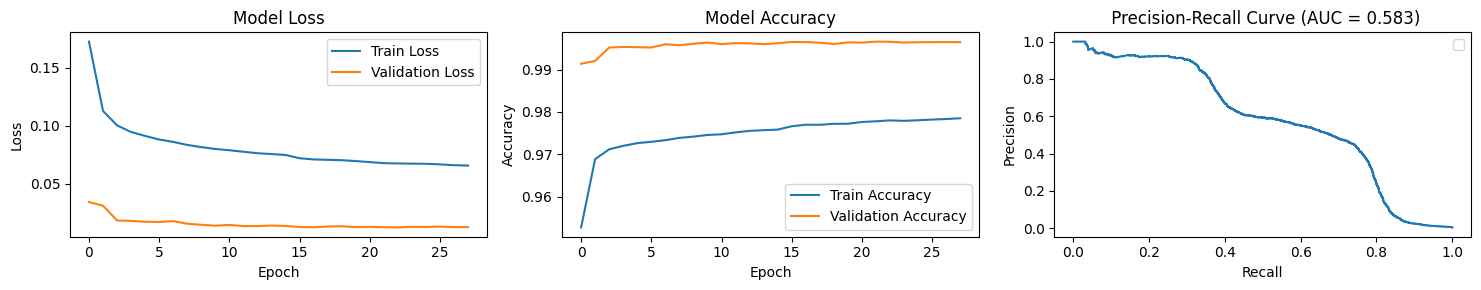

In [77]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(recall, precision)
plt.title(f" Precision-Recall Curve (AUC = {auc_:.3f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import joblib

model.save("fraud_detection_mlp.h5")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(label_encoders, "label_encoders.joblib")
joblib.dump(optimal_threshold, "optimal_threshold.joblib")
joblib.dump(list(X_train.columns), "feature_names.joblib")
print('Model Save')

Model Save
